In [1]:
import os
import random

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
config = Cfg.load_config_from_name('vgg_transformer')
config['cnn']['pretrained'] = False
config['device'] = 'cpu'
detector = Predictor(config)

d:\AppData\miniconda3\envs\ocr\Lib\site-packages\torch\nn\modules\transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Model weight C:\Users\dinhd\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!


In [1]:
from ocr.modules.predict import predict
from ocr.helpers.plot import *

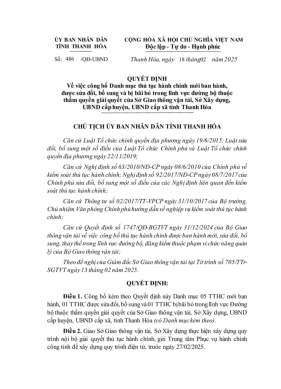

In [ ]:
files = os.listdir("./data")
file = random.choice(files)
img = cv2.imread(f"./data/{file}")

display_img(img)

In [ ]:
prediction, process_time = predict(
    file_path = os.path.join("./data", file),
    detector = detector
)

prediction

error: OpenCV(4.11.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-15:Bad number of channels) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x6a3ea619::Set<1,-1,-1>,struct cv::impl::A0x6a3ea619::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [ ]:
process_time

{'predict_total': 8.159367799758911,
 'preprocessing': {'preprocessing_total': 0.24282455444335938,
  'preprocessing_parts': {'binarization': 0.00402069091796875,
   'skew_correction': 0.15239953994750977,
   'noise_removal': 0.013931035995483398,
   'find_bounds': 0.010041952133178711,
   'find_left_bound': 0.002007007598876953,
   'find_right_bound': 0.0,
   'segmentation_total': 0.0,
   'segmentation_parts': {'horizontal_presegment': 0.0,
    'vertical_segment': 0.0}}},
 'predict_parts': {'sub_predict': [1.2335200309753418,
   1.9255561828613281,
   0.34732556343078613,
   0.9130072593688965,
   2.964451313018799,
   0.5244870185852051],
  'parse_words': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'parse_lines': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}}

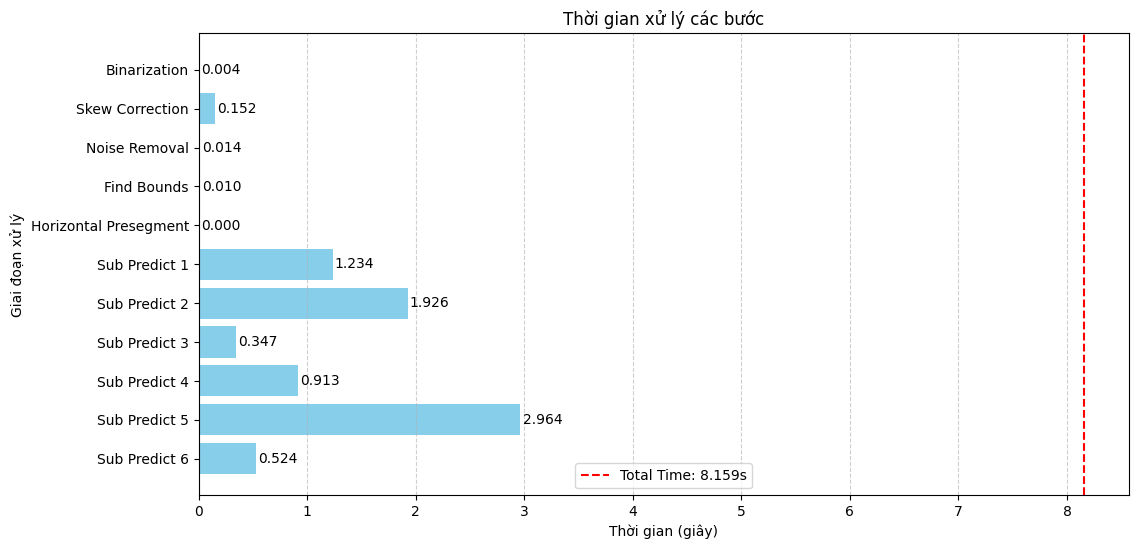

In [ ]:
def visualize_time(data):
    # Lấy dữ liệu từ input
    preprocessing = data['preprocessing']['preprocessing_parts']
    prediction = data['predict_parts']
    
    # Gom nhóm các phần dữ liệu
    preprocessing_data = {
        'Binarization': preprocessing['binarization'],
        'Skew Correction': preprocessing['skew_correction'],
        'Noise Removal': preprocessing['noise_removal'],
        'Find Bounds': preprocessing['find_bounds'],
        'Horizontal Presegment': preprocessing['segmentation_total']
    }
    
    prediction_data = {
        f'Sub Predict {i+1}': time for i, time in enumerate(prediction['sub_predict'])
    }
    
    total_time = data['predict_total']
    
    # Chuẩn bị dữ liệu để vẽ
    labels = list(preprocessing_data.keys()) + list(prediction_data.keys())
    values = list(preprocessing_data.values()) + list(prediction_data.values())
    
    # Vẽ biểu đồ
    plt.figure(figsize=(12, 6))
    plt.barh(labels, values, color="skyblue")
    plt.axvline(total_time, color='red', linestyle='--', label=f'Total Time: {total_time:.3f}s')
    
    plt.xlabel("Thời gian (giây)")
    plt.ylabel("Giai đoạn xử lý")
    plt.title("Thời gian xử lý các bước")
    plt.gca().invert_yaxis()
    plt.grid(axis="x", linestyle="--", alpha=0.6)
    plt.legend()
    
    # Hiển thị giá trị trên thanh
    for index, value in enumerate(values):
        plt.text(value + 0.02, index, f"{value:.3f}", va="center")
    
    plt.show()

visualize_time(process_time)